<a href="https://colab.research.google.com/github/Victoresteban-bit/METODOS-NUMERICS/blob/main/Regla_compuesta_de_Simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regla de Simpson Compuesta

La *Regla Compuesta de Simpson* es un método numérico para aproximar integrales definidas, especialmente útil cuando la función a integrar es suave. Este método divide el intervalo de integración en subintervalos pares y aplica la regla de Simpson en cada par consecutivo.

## Fórmula

Sea $ f \in C^4[a, b] $, y sea $ n $ un entero par. Dividimos el intervalo $[a, b]$ en $ n $ subintervalos de igual longitud $ h = \frac{b - a}{n} $, con puntos de división $ x_i = a + ih $ para $ i = 0, 1, \dots, n $. La aproximación de la integral $ \int_a^b f(x) \, dx $ está dada por:

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4 \sum_{\substack{i=1 \\ i \text{ impar}}}^{n-1} f(x_i) + 2 \sum_{\substack{i=2 \\ i \text{ par}}}^{n-2} f(x_i) + f(x_n) \right].
$$

## Error de Truncamiento

El error asociado a la Regla Compuesta de Simpson es:

$$
E(f) = -\frac{(b - a) h^4}{180} f^{(4)}(\xi),
$$

para algún $ \xi \in [a, b] $, donde $ f^{(4)} $ denota la cuarta derivada de $ f $.

La aproximación de la integral es: 53.60563008410071


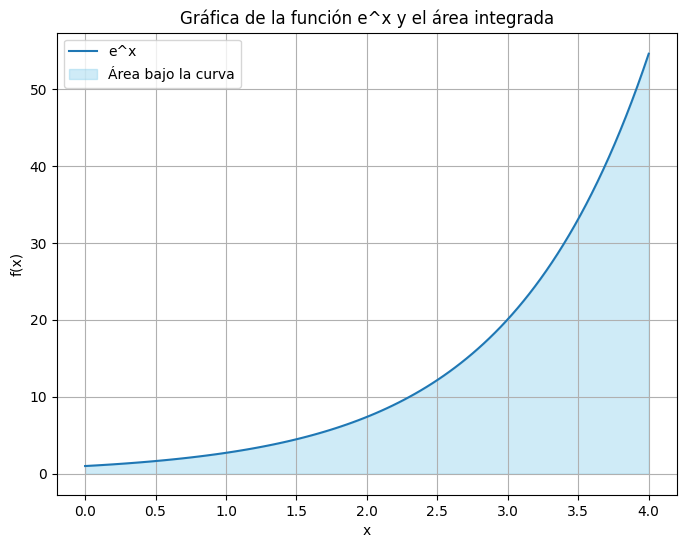

In [6]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

def simpsons_rule(f, a, b, n):

    if n % 2 != 0 or n <= 0:
        raise ValueError("El número de subintervalos (n) debe ser un entero par positivo.")

    h = (b - a) / n

    # Paso 2: Inicializar sumas
    xi0 = f(a) + f(b)
    xi1 = 0
    xi2 = 0

    # Paso 3, 4 y 5: Iterar a través de los puntos intermedios
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            xi2 += f(x)
        else:
            xi1 += f(x)

    # Paso 6: Calcular la aproximación final
    xi = (h / 3) * (xi0 + 4 * xi1 + 2 * xi2)

    # Paso 7: Salida
    return xi

# Ejemplo de uso:
# Definir una función para integrar
def my_function(x):
    return np.exp(x)

# Definir los límites y el número de subintervalos
a = 0
b = 4
n = 10

# Calcular la aproximación de la integral
integral_approx = simpsons_rule(my_function, a, b, n)

# Imprimir el resultado
print(f"La aproximación de la integral es: {integral_approx}")

# Generar puntos para la gráfica
x_values = np.linspace(a, b, 100)
y_values = my_function(x_values)

# Crear la gráfica
plt.figure(figsize=(8, 6)) # Crea una figura y define el tamaño
plt.plot(x_values, y_values, label='e^x') # Graficar la función
plt.fill_between(x_values, y_values, color='skyblue', alpha=0.4, label='Área bajo la curva') # Mostrar el área bajo la curva
plt.title('Gráfica de la función e^x y el área integrada') # Titulo
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('f(x)') # Etiqueta del eje y
plt.legend() # Mostrar las leyendas
plt.grid(True) # Mostrar la cuadricula
plt.show() # Mostrar la gráfica